1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

## 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

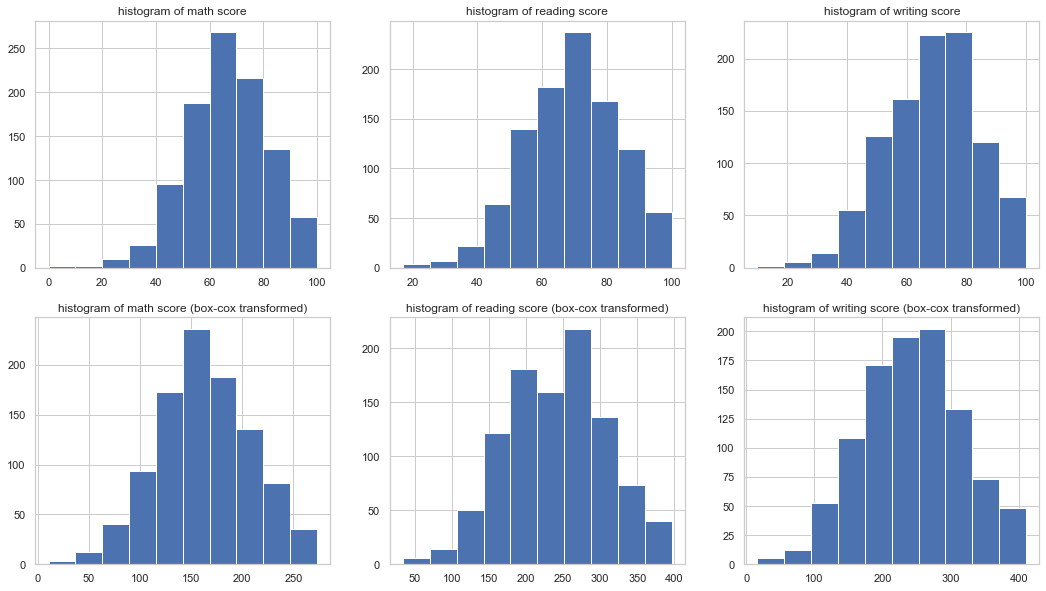

In [5]:
from scipy.stats import boxcox

# there is an observation with math score is equal to 0
# since box-cox transformation only works with positive data
# we are excluding it.
math_boxcox,_ = boxcox(students_df[students_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(students_df["reading score"])
writing_boxcox,_ = boxcox(students_df["writing score"])

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(students_df["math score"])
plt.title("histogram of math score")

plt.subplot(2, 3, 2)
plt.hist(students_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(2, 3, 3)
plt.hist(students_df["writing score"])
plt.title("histogram of writing score")

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()


In [7]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(students_df["math score"])
norm_stats = normaltest(students_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(students_df["reading score"])
norm_stats = normaltest(students_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(students_df["writing score"])
norm_stats = normaltest(students_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


In [8]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


## 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

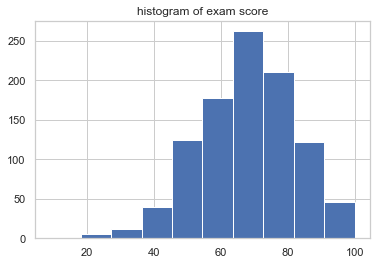

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [9]:
exam_score = (students_df["math score"] +
              students_df["reading score"] + students_df["writing score"])/3

plt.hist(exam_score)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

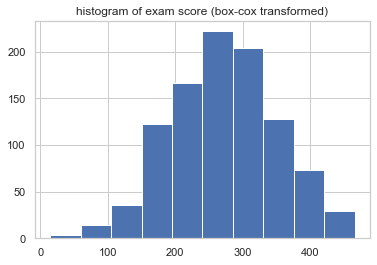

Jarque-Bera test statistics is 2.4353989331279173 and p value is 0.29591013563984203
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [10]:
exams_boxcox,_ = boxcox(exam_score)

plt.hist(exams_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

## 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

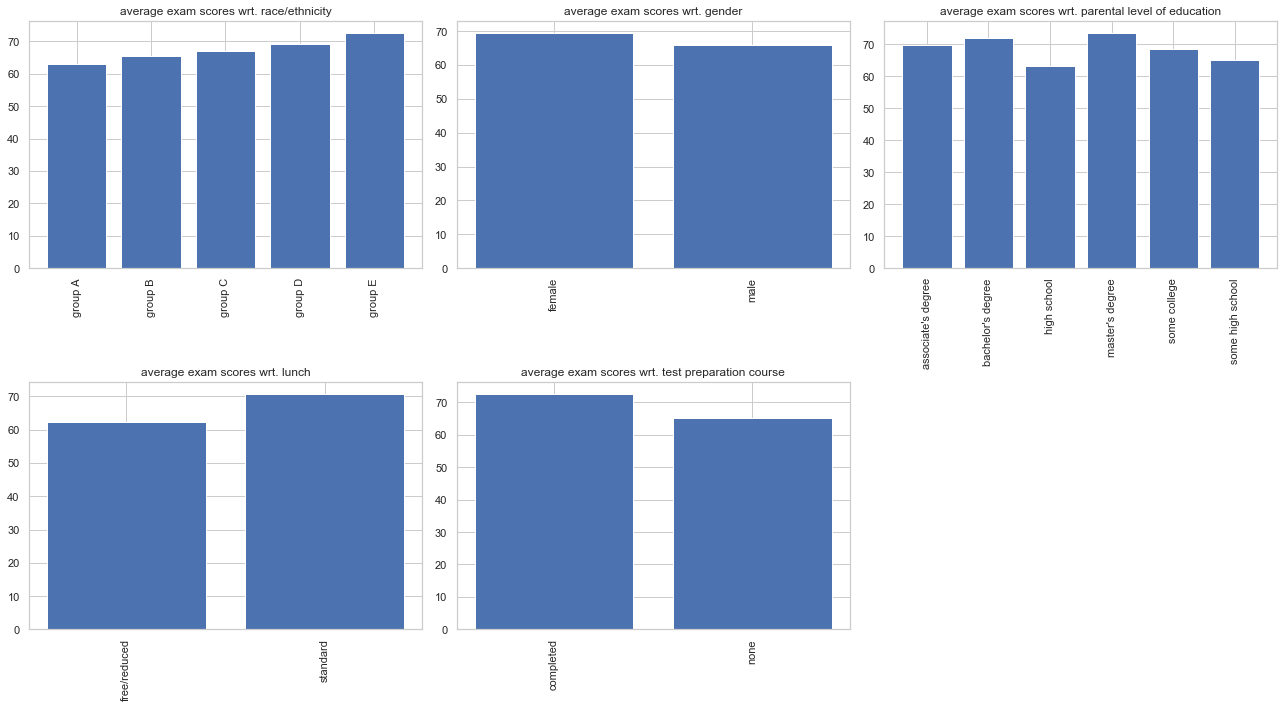

In [11]:
students_df["exam_score"] = exam_score

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(students_df.groupby("race/ethnicity")
        ["exam_score"].mean().index, students_df.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(students_df.groupby("gender")
        ["exam_score"].mean().index, students_df.groupby("gender")["exam_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(students_df.groupby("parental level of education")
        ["exam_score"].mean().index, students_df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(students_df.groupby("lunch")
        ["exam_score"].mean().index, students_df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(students_df.groupby("test preparation course")
        ["exam_score"].mean().index, students_df.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

1. Average exam score increases from group A to group E. Hence race/ethnicity may play an important role in explaining the successes in the exams.

2. Female students seem to be more successful than the males.

3. There is also some variation between the parental levels of education with respect to the exam scores.

4. Lunch type also exhibits variance in the average exam scores. But, this is probably not because of the lunch type itself but because of something that affects both the lunch type and the exam scores.

5. Those who completed the test preparation course seem to be more successful than the others.